In [12]:
import cv2
import pandas as pd
import numpy as np
from plotly import offline as ofl
from plotly import graph_objs as go
from PIL import Image
import matplotlib.pyplot as plt

In [13]:
path = r".\test4az.png"
img = cv2.imread(path)
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

In [14]:
print(gray, len(gray[0]),len(gray))

[[160 155 137 ... 161 157 154]
 [160 147 133 ... 160 157 158]
 [152 154 143 ... 167 174 176]
 ...
 [123 115 116 ... 202 187 189]
 [125 117 115 ... 179 175 170]
 [127 121 115 ... 168 167 164]] 200 200


In [15]:
sr = pd.Series(np.ravel(gray))
vc = sr.value_counts()
index = list(vc.index)
columns = list(vc)

In [16]:
ofl.init_notebook_mode(connected = True)

trace = go.Scatter(
    x = index,
    y = columns,
    mode = "markers"
)

layout = go.Layout(
    xaxis=dict(title="x_title", showline=True, linewidth=1, linecolor='black', mirror='ticks', ticks='inside', ticklen=10),
    yaxis=dict(title="y_title", showline=True, linewidth=1, linecolor='black', mirror='ticks', ticks='inside', ticklen=10),
    margin=dict(l=150, r=50, t=50, b=100, autoexpand=False),
    height=600,
    width=800,
    plot_bgcolor='rgba(0,0,0,0)',
    font=dict(family='Arial', size=28),
    legend=dict(x=0.1, xanchor='left', y=0.9, yanchor='top'),
)

fig = go.Figure(data=trace, layout=layout)

ofl.iplot(fig)

<class 'numpy.ndarray'>


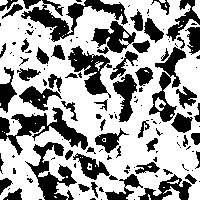

In [17]:
retval, dst = cv2.threshold(gray, 112, 255, cv2.THRESH_BINARY)
print(type(dst))
pil_2chi = Image.fromarray(dst)
pil_2chi

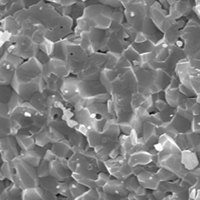

In [18]:
pil_gray = Image.fromarray(gray)
pil_gray

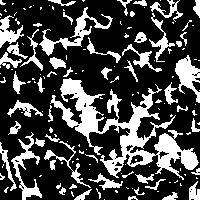

In [19]:
ret, img_otsu = cv2.threshold(gray, 0, 255, cv2.THRESH_OTSU)
pil_otsu = Image.fromarray(img_otsu)
pil_otsu

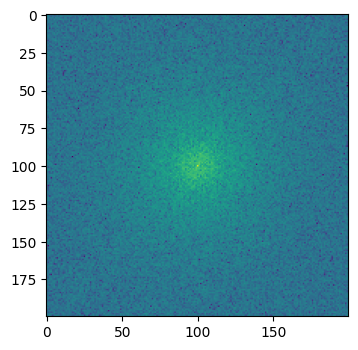

In [20]:
f_uv = np.fft.fft2(dst)
shifted_f_uv = np.fft.fftshift(f_uv)
magnitude_spectrum2d = 20 * np.log(np.absolute(shifted_f_uv))

plt.figure(dpi=100)
plt.imshow(magnitude_spectrum2d,)
plt.show()

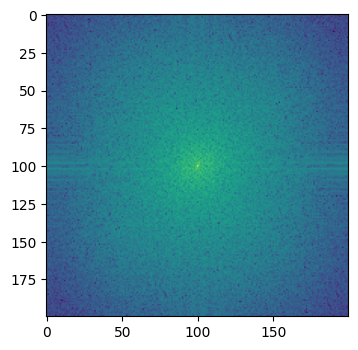

In [21]:
f_gray_uv = np.fft.fft2(gray)
shifted_f_gray_uv = np.fft.fftshift(f_gray_uv)
magnitude_gray_spectrum2d = 20 * np.log(np.absolute(shifted_f_gray_uv))

plt.figure(dpi=100)
plt.imshow(magnitude_gray_spectrum2d,)
plt.show()

In [22]:
f_otsu_uv = np.fft.fft2(img_otsu)
shifted_f_otsu_uv = np.fft.fftshift(f_otsu_uv)
magnitude_otsu_spectrum2d = 20 * np.log(np.absolute(shifted_f_otsu_uv))
print(magnitude_otsu_spectrum2d)
"""
plt.figure(dpi=100)
plt.imshow(magnitude_otsu_spectrum2d,)
plt.show()
"""

[[132.79751668 153.72984041 125.7511539  ... 154.34563359 125.7511539
  153.72984041]
 [176.75393031 164.79846181 182.70871866 ... 177.52236363 192.15588838
  159.77542215]
 [170.16836193 180.91965577 164.66480878 ... 162.03241175 195.03959879
  179.60824405]
 ...
 [193.59806167 180.07215976 175.26971929 ... 155.68821383 178.55398353
  179.36450286]
 [170.16836193 179.60824405 195.03959879 ... 154.19318163 164.66480878
  180.91965577]
 [176.75393031 159.77542215 192.15588838 ... 164.6093014  182.70871866
  164.79846181]]


'\nplt.figure(dpi=100)\nplt.imshow(magnitude_otsu_spectrum2d,)\nplt.show()\n'